In [68]:
%matplotlib inline
import pandas as pd


In [64]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [65]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  14
The Three Musketeers    12
Maya                    11
Temptation              10
Paradise                10
Hero                    10
The Outsider            10
Kismet                  10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [9]:
titles[(titles.year >= 1930) & (titles.year < 1940)].year.value_counts().head(3)

1937    1186
1936    1131
1938    1120
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

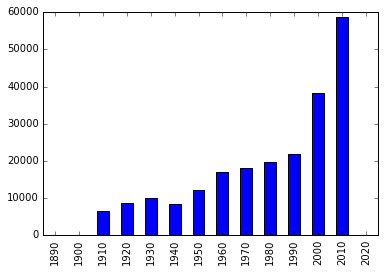

In [23]:
t = titles
t.year // 10 * 10
(t.year // 10 * 10).value_counts().sort_index().plot(kind = 'bar')

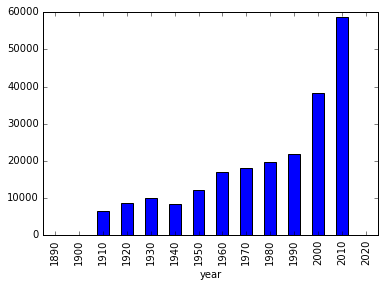

In [25]:
titles.groupby(t.year // 10 * 10).title.agg('count').sort_index().plot(kind = 'bar')

### Plot the number of "Hamlet" films made each decade.

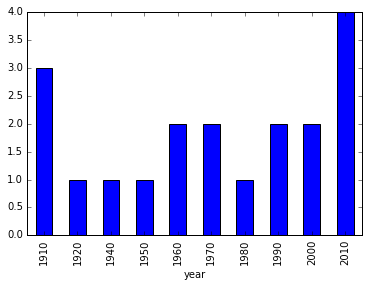

In [30]:
titles[titles.title == 'Hamlet'].groupby(titles.year // 10 * 10).title.agg('count').sort_index().plot(kind = 'bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

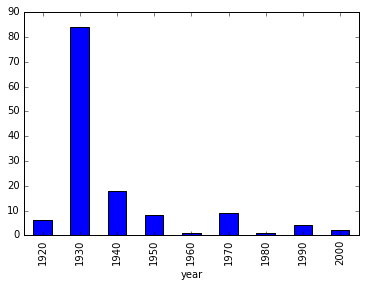

In [31]:
c = cast[cast.character == 'Rustler']
c.groupby(c.year // 10 * 10).character.agg('count').sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

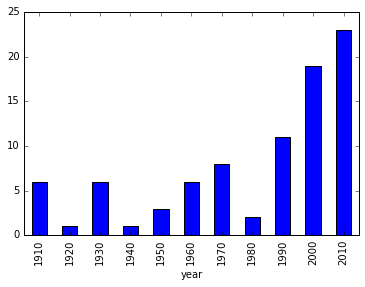

In [32]:
c = cast[cast.character == 'Hamlet']
c.groupby(c.year // 10 * 10).character.agg('count').sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [33]:
cast.character.value_counts().head(11)

Himself        18775
Dancer         11477
Extra           9728
Reporter        7809
Doctor          7078
Policeman       6639
Student         6626
Nurse           6309
Bartender       6291
Party Guest     6289
Minor Role      6092
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [34]:
c = cast[cast.character == 'Herself']
c.name.value_counts().head(10)


Joyce Brothers         14
Queen Elizabeth II     11
Mary Jo Pehl            7
Joan Rivers             7
Margaret Thatcher       7
Lili?n Garc?a           6
Sally Jessy Raphael     5
Rekha                   5
Caroline Rhea           5
Marilyn Monroe          5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [35]:
c = cast[cast.character == 'Himself']
c.name.value_counts().head(10)

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           21
Bill Clinton             20
Winston Churchill        20
Franklin D. Roosevelt    20
Benito Mussolini         19
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [36]:
cast[cast.year == 1945].name.value_counts()

Emmett Vogan                 39
Sam (II) Harris              30
Harold Miller                29
Bess Flowers                 28
Nolan Leary                  27
Frank O'Connor               26
Larry Steers                 25
Franklyn Farnum              25
Herman Hack                  24
Tom London                   24
Charles Sullivan             24
Edmund Cobb                  24
Pierre Watkin                24
Bud Osborne                  23
Horace B. Carpenter          23
Addison Richards             23
Budd Buster                  22
Byron Foulger                22
Kenner G. Kemp               22
Chester Clute                22
Jack Ingram                  22
Arthur Loft                  22
Lee Phelps                   22
Al Ferguson                  21
Jack O'Shea                  21
Edward Gargan                21
Rex Lease                    21
Milton Kibbee                21
Jack Tornek                  21
Beverly Reedy                20
                             ..
Scott Sa

### Which actors or actresses appeared in the most movies in the year 1985?

In [37]:
cast[cast.year == 1985].name.value_counts()

Mammootty                      21
Shakti Kapoor                  19
Sukumari                       19
Mohanlal                       15
Lou Scheimer                   15
Aruna Irani                    14
Raj Babbar                     14
Deven Verma                    13
Rajesh Khanna                  13
Jagdish Raj                    12
Satyendra Kapoor               12
Om Shivpuri                    12
Asrani                         12
Pinchoo Kapoor                 12
Danny Denzongpa                11
Innocent Vareed Thekkethala    11
Thilakan                       11
Yunus Parvez                   10
Rati Agnihotri                 10
Jagathi Sreekumar              10
Madan Puri                     10
Shobana                        10
Kulbhushan Kharbanda           10
Iftekhar                       10
Sharat Saxena                  10
Lalu Alex                       9
Mithun Chakraborty              9
Nedumudi Venu                   9
Vikas Anand                     9
Pat (II) Frale

### Plot how many roles Mammootty has played in each year of his career.

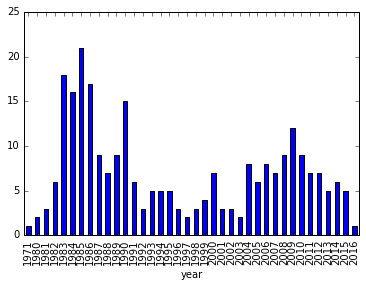

In [42]:
cast[cast.name == 'Mammootty'].groupby('year').agg('count').title.sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [48]:
cast[cast.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [47]:
cast[cast.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         56
Science Fair Student     9
Science Student          9
Science Fair Judge       5
Science Club Member      5
Science Reporter         5
Science Promo Cadet      4
Science Kid              4
Science Fair Kid         3
Science Fair Teacher     3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

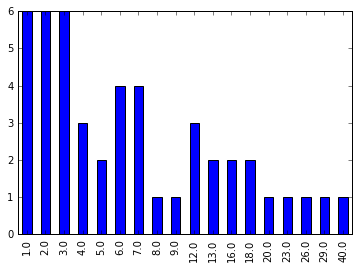

In [54]:
c = cast
c = c[c.name == 'Judi Dench']
c.n.value_counts().sort_index().plot(kind='bar')

### Plot the n-values of Cary Grant's roles through his career.

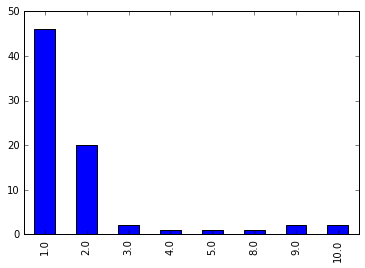

In [55]:
c = cast
c = c[c.name == 'Cary Grant']
c.n.value_counts().sort_index().plot(kind='bar')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

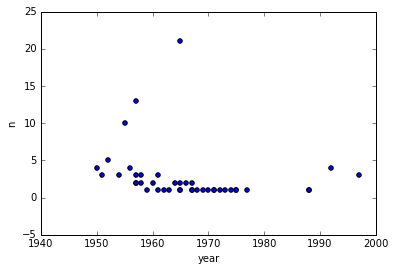

In [60]:
c = cast
c = c[c.name == 'Sidney Poitier'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x = 'year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [58]:
c = cast
c = c[(c.n == 1) & ((c.year //10 * 10) == 1950)]
c.type.value_counts()


actor      6453
actress    2866
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [59]:
c = cast
c = c[(c.n == 2) & ((c.year //10 * 10) == 1950)]
c.type.value_counts()

actress    4451
actor      4439
Name: type, dtype: int64